# Advanced Dataframes Notes 

In [65]:
import pandas as pd 
import numpy as np
np.random.seed(123)

In [66]:
students = ['Sally', 'Jane', 'Suzie', 'Billy', 'Ada', 'John', 'Thomas',
            'Marie', 'Albert', 'Richard', 'Isaac', 'Alan']

# randomly generate scores for each student for each subject
# note that all the values need to have the same length here
math_grades = np.random.randint(low=60, high=100, size=len(students))
english_grades = np.random.randint(low=60, high=100, size=len(students))
reading_grades = np.random.randint(low=60, high=100, size=len(students))

df = pd.DataFrame({'name': students,
                   'math': math_grades,
                   'english': english_grades,
                   'reading': reading_grades,
                   'classroom': np.random.choice(['A', 'B'], len(students))}) 
# This is a dictoioanry with a data type for students is a list of strings (np.array)
df

,name,math,english,reading,classroom
0,Sally,62,85,80,A
1,Jane,88,79,67,B
2,Suzie,94,74,95,A
3,Billy,98,96,88,B
4,Ada,77,92,98,A
5,John,79,76,93,B
6,Thomas,82,64,81,A
7,Marie,93,63,90,A
8,Albert,92,62,87,A
9,Richard,69,80,94,A


In [51]:
# What does each row/observation repersent? 
# - An indiviudals students record of their grade 
# - A student and their grade and their classroom
df.head()

,name,math,english,reading,classroom
0,Sally,74,92,82,B
1,Jane,74,99,85,B
2,Suzie,83,61,70,B
3,Billy,88,94,60,B
4,Ada,76,78,95,B


In [22]:
pd.DataFrame({"a", 1,2,3}, {"b", 1,2,3} )

,0
1,1
2,2
3,3
b,a


# Handy Pandas Functions for Reading Data
- pd.read_csv("filename.csv")
- pd.read_excel("filename.xlsx")
- pd.read_json("filename.json")
- pd.read_sql 
    - use syntatially correct SQL query and a conection object 
- pd.read_table 
    - can read a HTML table of content
- pd.read_clipboard() 
    - can read your clipboard into a dataframe

In [39]:
# First thing to do: 
 # create a env.py file and put into git ignore with your password, username, and IP adress.
from env import host, user, password

#connection string 
url = f'mysql+pymysql://{user}:{password}@{host}/employees'
query = """
    SELECT * FROM employees
"""
pd.read_sql(query, url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [34]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


In [46]:
#How to make a SQL query in Python (find all emp_no, first names, and last names of employees with the gender of F)
# recomended to use '''
sql = '''
SELECT
    emp_no,
    first_name,
    last_name
FROM employees
WHERE gender = 'F'
LIMIT 5
OFFSET 200
'''

pd.read_sql(sql, url)

,emp_no,first_name,last_name
0,10513,Yuichiro,Schicker
1,10519,Yonghoan,Alencar
2,10522,Marke,Cesareni
3,10524,Shigehiro,Cincotta
4,10526,Kwangho,Theuretzbacher


## Lets Talk Aggregation 
- Aggregation and grouping by allow us to put stuff together.
- can consider many things, one thing.

In [71]:
df.head()

,name,math,english,reading,classroom
0,Sally,62,85,80,A
1,Jane,88,79,67,B
2,Suzie,94,74,95,A
3,Billy,98,96,88,B
4,Ada,77,92,98,A


In [57]:
df[['english', 'reading', 'math']].agg(['mean', 'median', 'min', 'max']) 
# gives datafram with english reading and math but loses a level of detail which is names  and classrooms
# Aggregation changes what each row means.

,english,reading,math
mean,86.583333,80.25,78.416667
median,93.000000,80.50,78.000000
min,61.000000,60.00,64.000000
max,99.000000,99.00,88.000000


In [69]:
df.english.mean()

77.66666666666667

In [70]:
df.math.median()

90.0

In [67]:
# Grouping by means we are grouping our original rows together by some column's value.
df.head()

,name,math,english,reading,classroom
0,Sally,62,85,80,A
1,Jane,88,79,67,B
2,Suzie,94,74,95,A
3,Billy,98,96,88,B
4,Ada,77,92,98,A


In [73]:
#Step 1: group by a column 
#Step 2: we need an aggregate function 
df.groupby("classroom").math.mean()

classroom
A    82.625
B    89.250
Name: math, dtype: float64

In [74]:
df.groupby("classroom").math.mean(["mean", "median"])

classroom
A    82.625
B    89.250
Name: math, dtype: float64

In [75]:
df.groupby('classroom').name.count()

classroom
A    8
B    4
Name: name, dtype: int64

In [76]:
df.groupby('classroom').describe()

math                                                    english  \
          count    mean        std   min    25%   50%    75%   max   count   
classroom                                                                    
A           8.0  82.625  12.281665  62.0  75.00  87.0  92.25  94.0     8.0   
B           4.0  89.250   7.973916  79.0  85.75  90.0  93.50  98.0     4.0   

                  ...              reading                                  \
            mean  ...    75%   max   count    mean        std   min    25%   
classroom         ...                                                        
A          72.75  ...  81.25  92.0     8.0  87.125   8.887190  72.0  80.75   
B          87.50  ...  96.75  99.0     4.0  85.250  12.392874  67.0  82.75   

                              
            50%    75%   max  
classroom                     
A          88.5  94.25  98.0  
B          90.5  93.00  93.0  

[2 rows x 24 columns]

# Takeaway 
- whatever value/column we group by becomes the new observation level
- if the original rows were students each observation is a student
- when we groupby the classroom, each row is a classroom 

In [81]:
# Make a passing_math
df['passing_math'] = df.math >= 70
df.head()

,name,math,english,reading,classroom,passing_math
0,Sally,62,85,80,A,False
1,Jane,88,79,67,B,True
2,Suzie,94,74,95,A,True
3,Billy,98,96,88,B,True
4,Ada,77,92,98,A,True


In [86]:
df.groupby(["classroom", "passing_math"]).reading.agg(['mean', 'median', 'min', 'max'])
# Have to add a agg function to specify which column (reading) and what math functions to do. 

mean  median  min  max
classroom passing_math                             
A         False         87.000000    87.0   80   94
          True          87.166667    88.5   72   98
B         True          85.250000    90.5   67   93

In [87]:
df.groupby(["classroom", "passing_math"]).name.count()
# 2 people in A not passing math 6 people in A passing math and 4 people in B passing math.

classroom  passing_math
A          False           2
           True            6
B          True            4
Name: name, dtype: int64

In [90]:
# .transform to append agg to original dataframe
df.assign(avg_math_score_by_classroom = df.groupby(["classroom", "passing_math"]).math.transform(('mean')))

,name,math,english,reading,classroom,passing_math,avg_math_score_by_classroom
0,Sally,62,85,80,A,False,65.500000
1,Jane,88,79,67,B,True,89.250000
2,Suzie,94,74,95,A,True,88.333333
3,Billy,98,96,88,B,True,89.250000
4,Ada,77,92,98,A,True,88.333333
5,John,79,76,93,B,True,89.250000
6,Thomas,82,64,81,A,True,88.333333
7,Marie,93,63,90,A,True,88.333333
8,Albert,92,62,87,A,True,88.333333
9,Richard,69,80,94,A,False,65.500000


# Another Agg Example 

In [92]:
# Lets count the number of employees in each department from the employees_db

sql = '''
Select *
From departments
join dept_emp using(dept_no)
where to_date > now()
'''
employees = pd.read_sql(sql, url)
employees.head()

,dept_no,dept_name,emp_no,from_date,to_date
0,d009,Customer Service,10038,1989-09-20,9999-01-01
1,d009,Customer Service,10049,1992-05-04,9999-01-01
2,d009,Customer Service,10060,1992-11-11,9999-01-01
3,d009,Customer Service,10088,1992-03-21,9999-01-01
4,d009,Customer Service,10112,1998-05-01,9999-01-01


In [96]:
employees.groupby('dept_name').emp_no.count()

dept_name
Customer Service      17569
Development           61386
Finance               12437
Human Resources       12898
Marketing             14842
Production            53304
Quality Management    14546
Research              15441
Sales                 37701
Name: emp_no, dtype: int64

# In the code above what does each row represent?
- the number of employees within each department. 

In [102]:
# min, mean, median and max salary numbers by gender
sql = '''
Select *
From employees
Join salaries using(emp_no)
Where to_date > now();
'''
employees = pd.read_sql(sql, url)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01


In [104]:
employees.groupby("gender").salary.agg(["min", "mean", "median", "max", "count"])

,min,mean,median,max,count
gender,,,,,
F,38936,71963.570753,69764,152710,96010
M,38623,72044.656973,69830,158220,144114


In [106]:
sql = '''
Select *
From employees
Join salaries using(emp_no)
join dept_emp using(emp_no)
join departments using(dept_no)
Where dept_emp.to_date > now()
and salaries.to_date > now();
'''
employees = pd.read_sql(sql, url)
employees.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,from_date,to_date,dept_name
0,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,64254,2001-09-17,9999-01-01,1989-09-20,9999-01-01,Customer Service
1,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,51326,2002-05-02,9999-01-01,1992-05-04,9999-01-01,Customer Service
2,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,93188,2002-05-25,9999-01-01,1992-11-11,9999-01-01,Customer Service
3,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,98003,2001-08-30,9999-01-01,1992-03-21,9999-01-01,Customer Service
4,d009,10112,1963-08-13,Yuichiro,Swick,F,1985-10-08,61070,2002-04-30,9999-01-01,1998-05-01,9999-01-01,Customer Service


In [107]:
employees.groupby(["dept_name", "gender"]).salary.agg(["min", "mean", "median", "max", "count"])

min          mean   median     max  count
dept_name          gender                                             
Customer Service   F       39812  67409.493935  65198.0  144866   7007
                   M       39373  67202.791611  65100.0  143950  10562
Development        F       39469  67575.845881  66355.0  144434  24533
                   M       39036  67712.555911  66526.0  140784  36853
Finance            F       39949  78747.416633  78285.0  136978   5014
                   M       39012  78433.300418  77526.0  142395   7423
Human Resources    F       38936  64139.954731  62782.0  123268   5147
                   M       39611  63777.101922  62864.0  141953   7751
Marketing          F       39871  79699.771487  78595.5  141842   5864
                   M       39821  80293.380931  79481.0  145128   8978
Production         F       39476  67728.112560  66645.0  138273  21393
                   M       38623  67920.524490  66768.0  132552  31911
Quality Management F       39571  65561.837704  64685.0  122965   5872
                   M       38942  65360.862924  64258.0  132103   8674
Research           F       39526  68011.855201  66814.0  124158   6181
                   M       39186  67847.639957  66576.5  130211   9260
Sales              F       40392  88835.963931  88581.0  152710  14999
                   M       39426  88864.204872  88461.5  158220  22702

# Concatention
- pd.concat([df1, df2])
    - Merge
    - pd.merge(user, roles, left_on= 'role_id', right_on= 'id', how='left) 
        - (how) is an argument for the type of joi n (inner, left, right)
        - (left_on) forigne key that links with a primary key
        - (right_on) primary key that links with a forigne key
        - right first then left.

# Crosstabulation (sum of an intersection)
- pd.crosstab(df.passing_math, 

In [109]:
pd.crosstab(df.passing_math, df.classroom)

classroom,A,B
passing_math,,
False,2,0
True,6,4


In [119]:
pd.crosstab(employees.dept_name, employees.gender, normalize =True, margins = True)

gender,F,M,All
dept_name,,,
Customer Service,0.029181,0.043986,0.073166
Development,0.102168,0.153475,0.255643
Finance,0.020881,0.030913,0.051794
Human Resources,0.021435,0.032279,0.053714
Marketing,0.024421,0.037389,0.061810
Production,0.089091,0.132894,0.221985
Quality Management,0.024454,0.036123,0.060577
Research,0.025741,0.038563,0.064304
Sales,0.062464,0.094543,0.157006


In [121]:
df.pivot_table(values="math", index= "classroom", columns="passing_math", aggfunc= 'mean')

passing_math,False,True
classroom,,
A,65.5,88.333333
B,NaN,89.250000


# Indices 

In [123]:
df

,name,math,english,reading,classroom,passing_math
0,Sally,62,85,80,A,False
1,Jane,88,79,67,B,True
2,Suzie,94,74,95,A,True
3,Billy,98,96,88,B,True
4,Ada,77,92,98,A,True
5,John,79,76,93,B,True
6,Thomas,82,64,81,A,True
7,Marie,93,63,90,A,True
8,Albert,92,62,87,A,True
9,Richard,69,80,94,A,False


<AxesSubplot:ylabel='Frequency'>

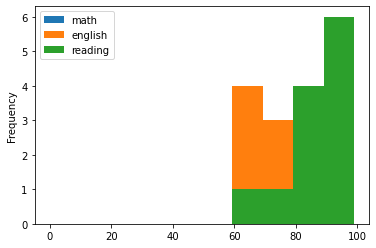

In [124]:
df.set_index('classroom').plot.hist()

In [141]:
df

,name,math,english,reading,classroom,passing_math
0,Sally,120.820460,120,38.263752,A,False
1,Jane,171.487105,114,32.045892,B,True
2,Suzie,183.179407,109,45.438205,A,True
3,Billy,190.974276,131,42.090127,B,True
4,Ada,150.051217,127,46.873096,A,True
5,John,153.948651,111,44.481612,B,True
6,Thomas,159.794802,99,38.742049,A,True
7,Marie,181.230690,98,43.046721,A,True
8,Albert,179.281973,97,41.611830,A,True
9,Richard,134.461480,115,44.959909,A,False


In [130]:
def nudge_the_grades(df):
    #cranks up math score by 10%
    # cranks down the reading score by 10%
    df.math = df.math + df.math *.10
    df.reading = df.reading - df.reading *.10
    return df

<function __main__.nudge_the_grades(df)>

In [131]:
def bump_english(df):
    df.english = df.english + 5 
    return df

In [133]:
bump_english(nudge_the_grades(df)).head()

,name,math,english,reading,classroom,passing_math
0,Sally,68.2,90,72.0,A,False
1,Jane,96.8,84,60.3,B,True
2,Suzie,103.4,79,85.5,A,True
3,Billy,107.8,101,79.2,B,True
4,Ada,84.7,97,88.2,A,True


In [142]:
# .pipe exists to take in fucntion definition and chain/read from left to right
#.pipe allows reading and order of application of the fucntion from left to right.
df.pipe(nudge_the_grades).pipe(bump_english).head()

,name,math,english,reading,classroom,passing_math
0,Sally,132.902506,125,34.437377,A,False
1,Jane,188.635815,119,28.841303,B,True
2,Suzie,201.497348,114,40.894385,A,True
3,Billy,210.071703,136,37.881114,B,True
4,Ada,165.056338,132,42.185787,A,True


# .loc and .iloc

In [143]:
df.iloc[:3]

,name,math,english,reading,classroom,passing_math
0,Sally,132.902506,125,34.437377,A,False
1,Jane,188.635815,119,28.841303,B,True
2,Suzie,201.497348,114,40.894385,A,True


In [145]:
df.loc[:3]

,name,math,english,reading,classroom,passing_math
0,Sally,132.902506,125,34.437377,A,False
1,Jane,188.635815,119,28.841303,B,True
2,Suzie,201.497348,114,40.894385,A,True
3,Billy,210.071703,136,37.881114,B,True


In [146]:
df.iloc[:3, 1:3]

,math,english
0,132.902506,125
1,188.635815,119
2,201.497348,114


In [151]:
# .loc[startign_row : ending_row, starting_column : ending_column]
df.loc[0:3, 'math':'reading'].head(4)

,math,english,reading
0,132.902506,125,34.437377
1,188.635815,119,28.841303
2,201.497348,114,40.894385
3,210.071703,136,37.881114
